# **ERA Prediction using Pybaseball**

In [1]:
import os
import numpy as np
import pandas as pd
from pybaseball import pitching_stats, batting_stats
from datascience import *
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
START = 2015
END = 2023

Every stadium was equipped with Statcast in 2015, hence the start date

In [3]:
pitching = pitching_stats(START, END, qual=20)

In [4]:
pitching.to_csv("pitching.csv")

In [5]:
pitching = pitching.groupby("IDfg", group_keys=False).filter(lambda x: x.shape[0] > 1)

In [6]:
pitching

,IDfg,Season,Name,Team,Age,W,L,WAR,ERA,G,...,LA,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,xERA
106,10954,2018,Jacob deGrom,NYM,30,10,9,9.0,1.70,32,...,11.1,20,0.039,112.9,148,0.287,515,0.164,0.315,NaN
230,2036,2015,Clayton Kershaw,LAD,27,16,7,8.6,2.13,33,...,8.9,15,0.028,113.3,132,0.244,542,0.164,0.323,NaN
776,10603,2017,Chris Sale,BOS,28,17,8,7.6,2.90,32,...,15.0,27,0.055,112.7,149,0.303,492,0.183,0.332,NaN
448,13125,2019,Gerrit Cole,HOU,28,20,5,7.5,2.50,33,...,14.0,25,0.057,115.2,156,0.355,440,0.171,0.339,NaN
468,3137,2018,Max Scherzer,WSN,33,18,7,7.5,2.53,33,...,20.6,34,0.068,111.1,159,0.316,503,0.165,0.327,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107,13418,2017,Chris Beck,CHW,26,2,1,-1.2,6.40,57,...,14.5,15,0.070,112.3,77,0.360,214,0.151,0.226,NaN
3011,11528,2016,Josh Osich,SFG,27,1,3,-1.2,4.71,59,...,0.8,6,0.054,111.8,35,0.313,112,0.113,0.217,NaN
4201,15846,2021,Adam Plutko,BAL,29,1,2,-1.2,6.71,38,...,23.2,21,0.116,113.1,72,0.398,181,0.114,0.217,NaN
3219,18282,2018,Jarlin Garcia,MIA,25,3,3,-1.3,4.91,29,...,12.8,22,0.105,112.0,78,0.371,210,0.175,0.257,NaN


# Data Cleaning

In [7]:
def next_season(player):
    player = player.sort_values("Season")
    player["Next ERA"] = player["ERA"].shift(-1)
    return player

pitching = pitching.groupby("IDfg", group_keys=False).apply(next_season)

In [8]:
null_count = pitching.isnull().sum()

In [9]:
no_null_columns = list(pitching.columns[null_count == 0])

In [10]:
no_null_columns

['IDfg',
 'Season',
 'Name',
 'Team',
 'Age',
 'W',
 'L',
 'WAR',
 'ERA',
 'G',
 'GS',
 'CG',
 'ShO',
 'SV',
 'BS',
 'IP',
 'TBF',
 'H',
 'R',
 'ER',
 'HR',
 'BB',
 'IBB',
 'HBP',
 'WP',
 'BK',
 'SO',
 'GB',
 'FB',
 'LD',
 'IFFB',
 'Balls',
 'Strikes',
 'Pitches',
 'RS',
 'IFH',
 'BU',
 'BUH',
 'K/9',
 'BB/9',
 'K/BB',
 'H/9',
 'HR/9',
 'AVG',
 'WHIP',
 'BABIP',
 'LOB%',
 'FIP',
 'GB/FB',
 'LD%',
 'GB%',
 'FB%',
 'IFFB%',
 'HR/FB',
 'IFH%',
 'BUH%',
 'RAR',
 'Dollars',
 'tERA',
 'xFIP',
 'WPA',
 '-WPA',
 '+WPA',
 'RE24',
 'REW',
 'pLI',
 'inLI',
 'gmLI',
 'exLI',
 'Pulls',
 'WPA/LI',
 'Clutch',
 'O-Swing%',
 'Z-Swing%',
 'Swing%',
 'O-Contact%',
 'Z-Contact%',
 'Contact%',
 'Zone%',
 'F-Strike%',
 'SwStr%',
 'HLD',
 'SD',
 'MD',
 'ERA-',
 'FIP-',
 'xFIP-',
 'K%',
 'BB%',
 'SIERA',
 'RS/9',
 'E-F',
 'O-Swing% (sc)',
 'Z-Swing% (sc)',
 'Swing% (sc)',
 'O-Contact% (sc)',
 'Z-Contact% (sc)',
 'Contact% (sc)',
 'Zone% (sc)',
 'Pace',
 'RA9-WAR',
 'BIP-Wins',
 'LOB-Wins',
 'FDP-Wins',
 'Age 

In [11]:
pitching = pitching[no_null_columns + ["Next ERA"]].copy()

In [12]:
pitching.dtypes[pitching.dtypes == 'object']

Name       object
Team       object
Dollars    object
Age Rng    object
dtype: object

In [13]:
del pitching["Age Rng"]
del pitching["Dollars"]
del pitching["tERA"]

In [14]:
pitching["team_code"] = pitching["Team"].astype("category").cat.codes

In [15]:
pitching_full = pitching.copy()
pitching = pitching.dropna()

# Machine Learning

In [16]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import TimeSeriesSplit

rr = Ridge(alpha=1)

split = TimeSeriesSplit(n_splits=3)

sfs = SequentialFeatureSelector(rr, n_features_to_select=45, direction="forward", cv=split, n_jobs=4)

In [17]:
removed_columns = ["Next ERA", "Name", "Team", "IDfg", "Season", "Events"]
selected_columns = pitching.columns[~pitching.columns.isin(removed_columns)]
selected_columns

Index(['Age', 'W', 'L', 'WAR', 'ERA', 'G', 'GS', 'CG', 'ShO', 'SV',
       ...
       'EV', 'LA', 'Barrels', 'Barrel%', 'maxEV', 'HardHit', 'HardHit%',
       'CStr%', 'CSW%', 'team_code'],
      dtype='object', length=147)

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pitching.loc[:, selected_columns] = scaler.fit_transform(pitching[selected_columns])

In [19]:
pitching.describe()

,IDfg,Season,Age,W,L,WAR,ERA,G,GS,CG,...,Barrels,Barrel%,maxEV,HardHit,HardHit%,Events,CStr%,CSW%,Next ERA,team_code
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,12003.556315,2018.328776,0.358685,0.219963,0.238418,0.233201,0.337545,0.394486,0.284105,0.022569,...,0.244538,0.360082,0.460614,0.290324,0.533308,234.174154,0.502370,0.440718,4.220241,0.453049
std,5486.120661,2.270386,0.141712,0.186344,0.184004,0.125922,0.115573,0.249250,0.333335,0.082236,...,0.181854,0.144159,0.141269,0.218104,0.135972,155.876520,0.135933,0.118577,1.482204,0.310661
min,18.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,0.000000,0.000000,0.000000,0.000000
25%,7593.000000,2016.000000,0.240000,0.090909,0.105263,0.153846,0.258958,0.215190,0.000000,0.000000,...,0.101695,0.260116,0.366120,0.127930,0.443325,119.000000,0.413333,0.359504,3.200000,0.166667
50%,12768.000000,2018.000000,0.360000,0.181818,0.210526,0.192308,0.325000,0.341772,0.142857,0.000000,...,0.186441,0.346821,0.453552,0.207031,0.531486,175.000000,0.500000,0.429752,4.055000,0.433333
75%,15823.000000,2020.000000,0.440000,0.318182,0.368421,0.278846,0.400833,0.607595,0.571429,0.000000,...,0.338983,0.445087,0.547814,0.429688,0.622166,335.250000,0.586667,0.512397,5.020000,0.700000
max,27779.000000,2022.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,686.000000,1.000000,1.000000,12.050000,1.000000


In [20]:
sfs.fit(pitching[selected_columns], pitching["Next ERA"])

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None),
                          estimator=Ridge(alpha=1), n_features_to_select=45,
                          n_jobs=4)

In [53]:
predictors = list(selected_columns[sfs.get_support()])
predictors

['WAR',
 'CG',
 'ShO',
 'BS',
 'IP',
 'TBF',
 'R',
 'ER',
 'WP',
 'SO',
 'GB',
 'FB',
 'IFFB',
 'Strikes',
 'LOB%',
 'FIP',
 'GB/FB',
 'FB%',
 'IFH%',
 'RAR',
 'Clutch',
 'Swing%',
 'Z-Contact%',
 'Contact%',
 'MD',
 'FIP-',
 'K%',
 'Swing% (sc)',
 'Contact% (sc)',
 'Pace',
 'LOB-Wins',
 'Cent%',
 'Hard%',
 'TTO%',
 'Z-Swing% (pi)',
 'Swing% (pi)',
 'Contact% (pi)',
 'Pace (pi)',
 'K/BB+',
 'LOB%+',
 'FB%+',
 'Cent%+',
 'Med%+',
 'EV',
 'LA']

In [54]:
def backtest(data, model, predictors, start=5, step=1):
    all_predictions = []
    years = sorted(data["Season"].unique())

    for i in range(start, len(years), step):
        current_year = years[i]

        train = data[data["Season"] < current_year]
        test = data[data["Season"] == current_year]
        model.fit(train[predictors], train["Next ERA"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["Next ERA"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [55]:
predictions = backtest(pitching, rr, predictors)

In [56]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predictions["actual"], predictions["prediction"])
mse ** 0.5

1.3456679529826756

In [57]:
pitching["Next ERA"].describe()

count    3072.000000
mean        4.220241
std         1.482204
min         0.000000
25%         3.200000
50%         4.055000
75%         5.020000
max        12.050000
Name: Next ERA, dtype: float64

In [58]:
def player_history(df):
    df = df.sort_values("Season")
    df["player_season"] = range(0, df.shape[0])
    df["ERA_corr"] = list(df[["player_season", "ERA"]].expanding().corr().loc[(slice(None), "player_season"), "ERA"])
    df["ERA_corr"].fillna(1, inplace=True)

    df["ERA_diff"] = df["ERA"] / df["ERA"].shift(1)
    df["ERA_diff"].fillna(1, inplace=True)

    df["ERA_diff"][df["ERA_diff"] == np.inf] = 1

    return df

pitching = pitching.groupby("IDfg", group_keys=False).apply(player_history)

In [59]:
def group_averages(df):
    return df["ERA"] / df["ERA"].mean()

In [60]:
pitching["ERA_season"] = pitching.groupby("Season", group_keys=False).apply(group_averages)

In [61]:
pd.Series(rr.coef_, index=predictors).sort_values()

SO              -2.005315
K/BB+           -1.203712
GB/FB           -1.138838
MD              -0.873784
K%              -0.845535
FIP             -0.677771
TBF             -0.669805
ShO             -0.499469
Swing%          -0.491821
RAR             -0.486378
FB%             -0.428718
LA              -0.358893
FIP-            -0.351444
LOB%+           -0.343239
Swing% (sc)     -0.316759
IFH%            -0.274808
Swing% (pi)     -0.272971
Clutch          -0.222823
Contact% (sc)   -0.195671
Pace (pi)       -0.195084
Pace            -0.195084
Cent%+          -0.173269
Contact% (pi)   -0.125053
Strikes         -0.113895
TTO%            -0.111175
Cent%           -0.042488
IP              -0.017091
GB              -0.012761
WAR              0.067443
WP               0.257841
Contact%         0.263484
EV               0.309776
FB               0.397547
BS               0.409212
Med%+            0.411019
Hard%            0.472075
LOB-Wins         0.503800
CG               0.701654
ER          

In [62]:
diff = predictions["actual"] - predictions["prediction"]
merged = predictions.merge(pitching, left_index=True, right_index=True)
merged["diff"] = (predictions["actual"] - predictions["prediction"]).abs()
merged[["IDfg", "Season", "Name", "ERA", "Next ERA", "diff"]].sort_values(["diff"])

,IDfg,Season,Name,ERA,Next ERA,diff
111,8700,2022,Justin Verlander,0.145833,3.60,0.000451
3148,19618,2022,Jordan Hicks,0.403333,3.93,0.002210
3326,10123,2022,Kyle Gibson,0.420833,4.60,0.003527
221,15451,2020,Mike Mayers,0.175000,3.84,0.005526
1327,21290,2021,Lucas Gilbreath,0.281667,4.19,0.007113
...,...,...,...,...,...,...
4181,27505,2021,Kohei Arihara,0.553333,9.45,4.464756
2869,13345,2022,Luis Cessa,0.380833,9.00,4.493255
3041,16943,2021,Sean Newcomb,0.394167,8.78,4.608283
2077,19911,2022,Jose Suarez,0.330000,9.62,5.388852


# Linear Regression of most prevelant features in model

In [63]:
x = pitching['SO']
y = pitching['ERA']
mean_x = np.mean(x)
x_deviations = x - mean_x

mean_y = np.mean(y)
y_deviations = y - mean_y

covariance = np.mean(x_deviations * y_deviations)
covariance

sqr_x_dev = np.square(x_deviations)
sqr_y_dev = np.square(y_deviations)

x_var = np.mean(sqr_x_dev)
y_var = np.mean(sqr_y_dev)

x_sd = np.sqrt(x_var)
y_sd = np.sqrt(y_var)

cc = covariance / (x_sd * y_sd)
cc

-0.19553625689325646

In [64]:
slope = cc * (y_sd/x_sd)
intercept = mean_y - (cc * (y_sd/x_sd) * mean_x)
print(slope, intercept)

def lin_reg(slope, intercept):
    lin_reg = pitching
    x = lin_reg['SO']
    y = lin_reg['ERA']
    predictions = Table().with_columns('Y Prediction', make_array())
    for i in x:
        prediction = (slope * i) + intercept
        predictions.append((prediction,))
        y_prediction = predictions.column('Y Prediction')
    error = y - y_prediction
    rsme = np.sqrt(np.mean(error**2))
    return rsme
parameters = minimize(lin_reg)
print(parameters)

-0.137937149029 0.368289550512
[-0.13793714  0.36828886]


<Axes: xlabel='SO', ylabel='ERA'>

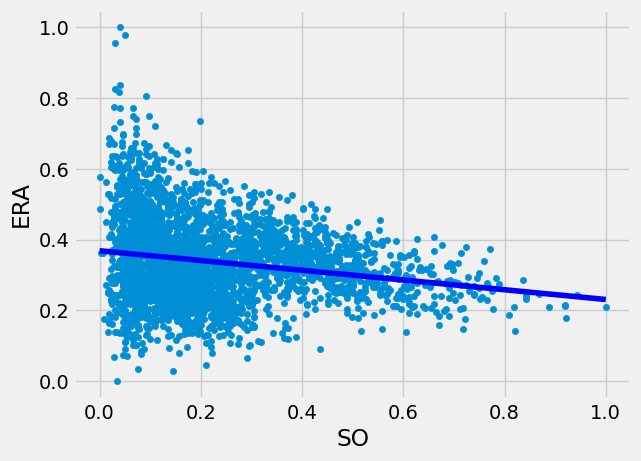

In [65]:
lin_reg_plot = pitching.plot.scatter('SO', 'ERA')
regline_x_values = np.arange(min(x)-0, max(x)+1)
regline_y_values = regline_x_values * slope + intercept
plots.plot(regline_x_values, regline_y_values, 'b')
lin_reg_plot

In [66]:
x = pitching['K/BB+']
y = pitching['ERA']
mean_x = np.mean(x)
x_deviations = x - mean_x

mean_y = np.mean(y)
y_deviations = y - mean_y

covariance = np.mean(x_deviations * y_deviations)
covariance

sqr_x_dev = np.square(x_deviations)
sqr_y_dev = np.square(y_deviations)

x_var = np.mean(sqr_x_dev)
y_var = np.mean(sqr_y_dev)

x_sd = np.sqrt(x_var)
y_sd = np.sqrt(y_var)

cc = covariance / (x_sd * y_sd)
cc

-0.35812729382967884

In [67]:
slope = cc * (y_sd/x_sd)
intercept = mean_y - (cc * (y_sd/x_sd) * mean_x)
print(slope, intercept)

def lin_reg(slope, intercept):
    lin_reg = pitching
    x = lin_reg['K/BB+']
    y = lin_reg['ERA']
    predictions = Table().with_columns('Y Prediction', make_array())
    for i in x:
        prediction = (slope * i) + intercept
        predictions.append((prediction,))
        y_prediction = predictions.column('Y Prediction')
    error = y - y_prediction
    rsme = np.sqrt(np.mean(error**2))
    return rsme
parameters = minimize(lin_reg)
print(parameters)

-0.540807660743 0.405395970683
[-0.54080763  0.40539602]


<Axes: xlabel='K/BB+', ylabel='ERA'>

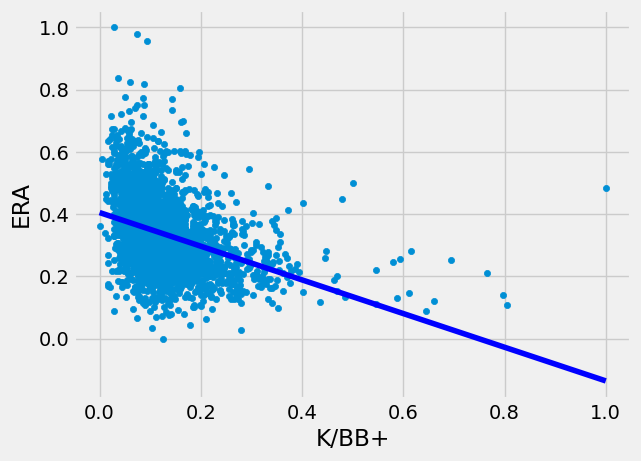

In [68]:
lin_reg_plot = pitching.plot.scatter('K/BB+', 'ERA')
regline_x_values = np.arange(min(x)-0, max(x)+1)
regline_y_values = regline_x_values * slope + intercept
plots.plot(regline_x_values, regline_y_values, 'b')
lin_reg_plot

In [69]:
x = pitching['LOB%']
y = pitching['ERA']
mean_x = np.mean(x)
x_deviations = x - mean_x

mean_y = np.mean(y)
y_deviations = y - mean_y

covariance = np.mean(x_deviations * y_deviations)
covariance

sqr_x_dev = np.square(x_deviations)
sqr_y_dev = np.square(y_deviations)

x_var = np.mean(sqr_x_dev)
y_var = np.mean(sqr_y_dev)

x_sd = np.sqrt(x_var)
y_sd = np.sqrt(y_var)

cc = covariance / (x_sd * y_sd)
cc

-0.71377377584018387

In [70]:
slope = cc * (y_sd/x_sd)
intercept = mean_y - (cc * (y_sd/x_sd) * mean_x)
print(slope, intercept)

def lin_reg(slope, intercept):
    lin_reg = pitching
    x = lin_reg['LOB%']
    y = lin_reg['ERA']
    predictions = Table().with_columns('Y Prediction', make_array())
    for i in x:
        prediction = (slope * i) + intercept
        predictions.append((prediction,))
        y_prediction = predictions.column('Y Prediction')
    error = y - y_prediction
    rsme = np.sqrt(np.mean(error**2))
    return rsme
parameters = minimize(lin_reg)
print(parameters)

-0.656204165448 0.707615432725
[-0.65620416  0.70761545]


<Axes: xlabel='LOB%', ylabel='ERA'>

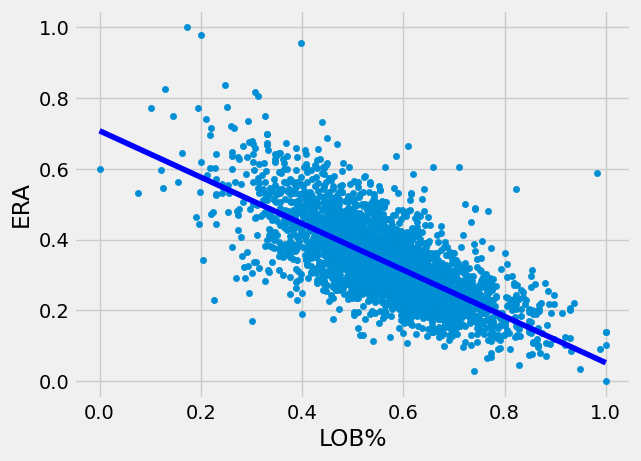

In [71]:
lin_reg_plot = pitching.plot.scatter('LOB%', 'ERA')
regline_x_values = np.arange(min(x)-0, max(x)+1)
regline_y_values = regline_x_values * slope + intercept
plots.plot(regline_x_values, regline_y_values, 'b')
lin_reg_plot

# Least Prevelant Feature (Ground Balls)



In [72]:
x = pitching['GB']
y = pitching['ERA']
mean_x = np.mean(x)
x_deviations = x - mean_x

mean_y = np.mean(y)
y_deviations = y - mean_y

covariance = np.mean(x_deviations * y_deviations)
covariance

sqr_x_dev = np.square(x_deviations)
sqr_y_dev = np.square(y_deviations)

x_var = np.mean(sqr_x_dev)
y_var = np.mean(sqr_y_dev)

x_sd = np.sqrt(x_var)
y_sd = np.sqrt(y_var)

cc = covariance / (x_sd * y_sd)
cc

-0.050355191850652813

In [73]:
slope = cc * (y_sd/x_sd)
intercept = mean_y - (cc * (y_sd/x_sd) * mean_x)
print(slope, intercept)

def lin_reg(slope, intercept):
    lin_reg = pitching
    x = lin_reg['GB']
    y = lin_reg['ERA']
    predictions = Table().with_columns('Y Prediction', make_array())
    for i in x:
        prediction = (slope * i) + intercept
        predictions.append((prediction,))
        y_prediction = predictions.column('Y Prediction')
    error = y - y_prediction
    rsme = np.sqrt(np.mean(error**2))
    return rsme
parameters = minimize(lin_reg)
print(parameters)

-0.0315140114795 0.345336031442
[-0.03151399  0.34533416]


<Axes: xlabel='GB', ylabel='ERA'>

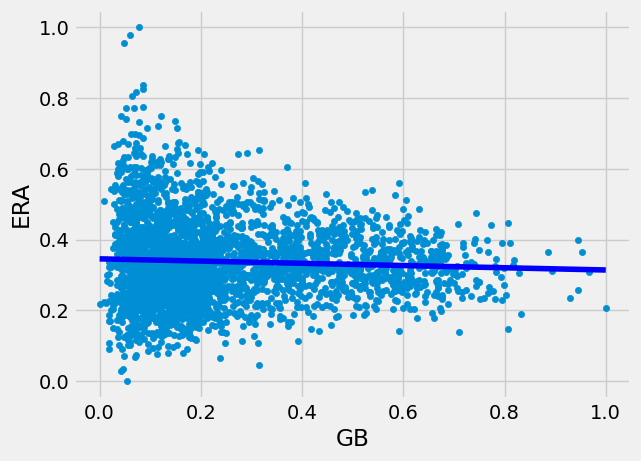

In [74]:
lin_reg_plot = pitching.plot.scatter('GB', 'ERA')
regline_x_values = np.arange(min(x)-0, max(x)+1)
regline_y_values = regline_x_values * slope + intercept
plots.plot(regline_x_values, regline_y_values, 'b')
lin_reg_plot

Every new model I made **SO** had the highest coefficient, but it seems as if it is not the best indicator of ERA. Some excluded stats like fielding independent pitching would be useful but were tied to close to actual ERA.